## 1.4.10 Histograms in OpenCV (p.106~118)


## Histograms - 1 : Find, Plot, Analyze !!!

Find Histogram

1. Histogram Calculation in OpenCV

In [ ]:
img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

2. Histogram Calculation in Numpy

In [ ]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

## Plotting Histograms


1. Using Matplotlib

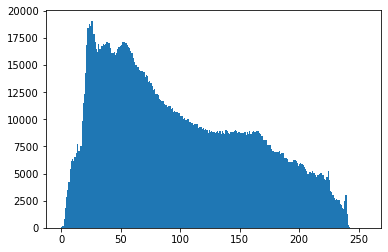

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('d150ccde31d79f3a53f5e633052d091b.jpg',0)

plt.hist(img.ravel(), 256, [0,256]); 
plt.show()


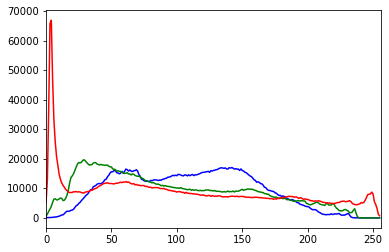

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('d150ccde31d79f3a53f5e633052d091b.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

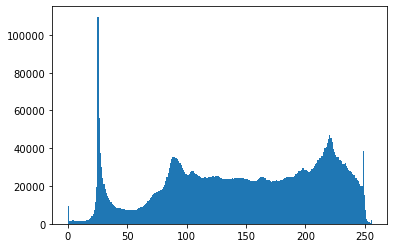

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-clouds-daytime-994605.jpg',0)

plt.hist(img.ravel(), 256, [0,256]); 
plt.show()


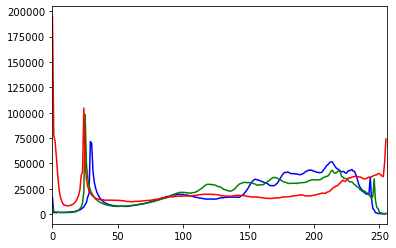

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-clouds-daytime-994605.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

2. Using OpenCV


Application of Mask


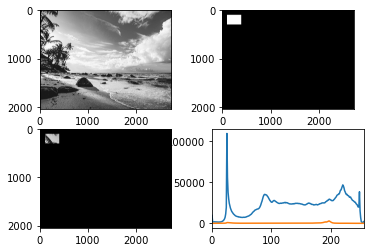

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-clouds-daytime-994605.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255  #100:300, 100:400
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask

hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


## Histograms - 2: Histogram Equalization

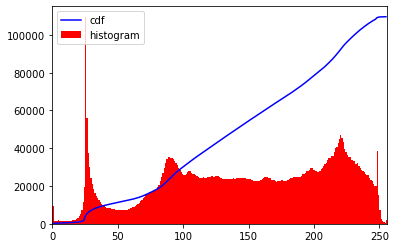

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-clouds-daytime-994605.jpg',0)

hist,bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [22]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [23]:
img2 = cdf[img]

Histograms Equalization in OpenCV

In [33]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

cv2.imwrite('clahe_2.jpg',res)

True

CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [34]:
import numpy as np
import cv2

img = cv2.imread('beach-clouds-daytime-994605.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_2.jpg',cl1)


True

## 1.4.11 Image Transforms in OpenCV (skip)

## 1.4.12 Template Matching

Template Matching in OpenCV

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('hmson1.avi_000083291.png',0) #hmson1.avi_000083291.png
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0) #20201105_125557.png

w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


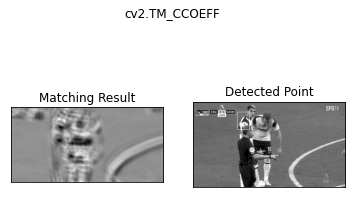

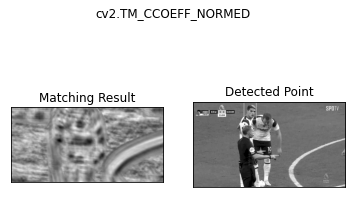

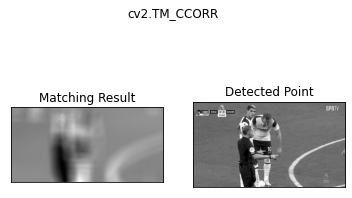

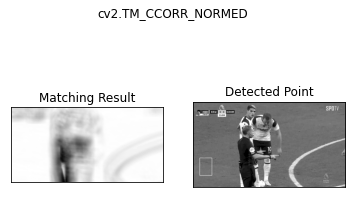

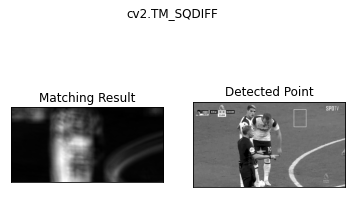

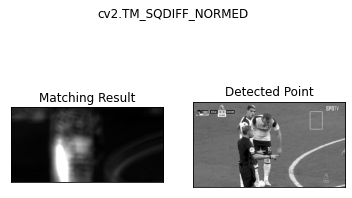

In [47]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Template Matching with Multiple Objects

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2)

cv2.imwrite('res.png',img_rgb)


True